导入所需模块


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model


: 

In [3]:
data = pd.read_csv('Admission_Predict.csv')
# 查看 data 中的数据
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# 生成描述性统计数据
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# 查看 data 数据中是否有缺失数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<AxesSubplot:>

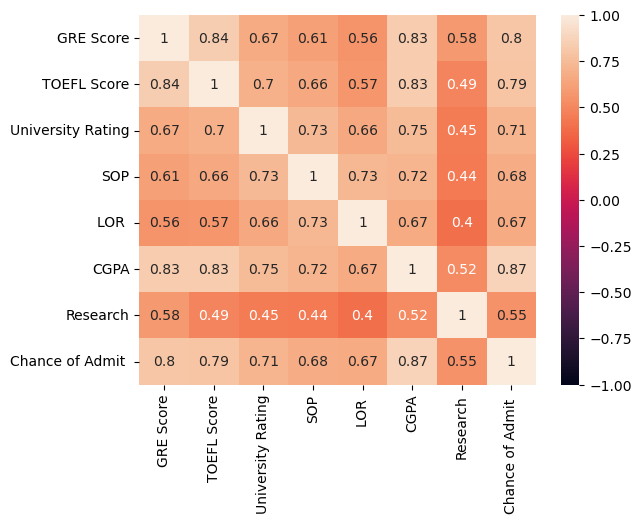

In [6]:
# 取出相关字段，并生成相关性的可视化图
field = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
sns.heatmap(data[field].corr(), annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

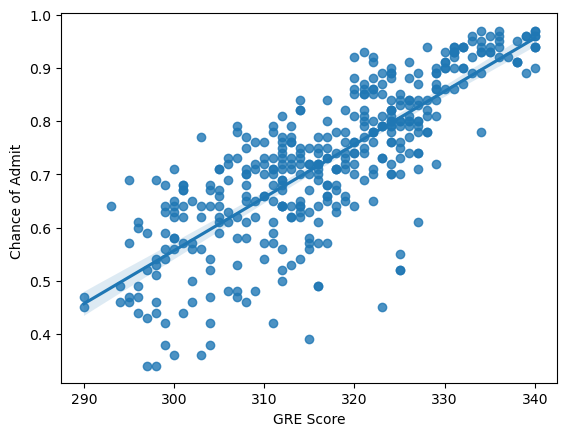

In [7]:
# GRE成绩与入学承认率的关系
sns.regplot(x='GRE Score', y='Chance of Admit ', data=data)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

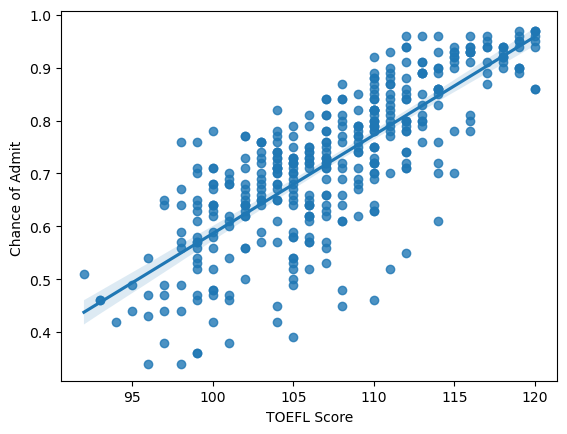

In [8]:
# 托福分数与入学承认率的关系
sns.regplot(x='TOEFL Score', y='Chance of Admit ', data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

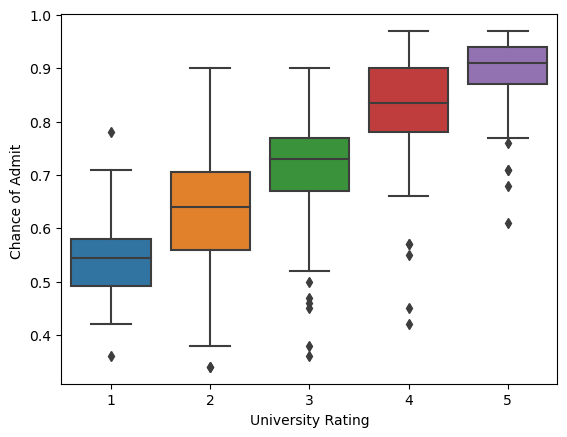

In [9]:
# 大学评分与入学承认率的关系
sns.boxplot(x='University Rating', y='Chance of Admit ', data=data)


<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

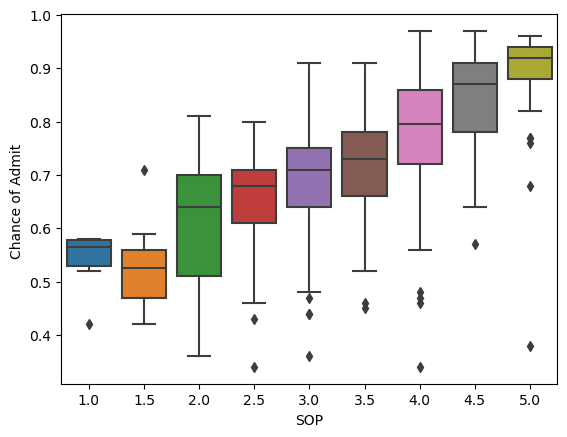

In [10]:
# 算目的陈述与入学承认率的关系
sns.boxplot(x='SOP', y='Chance of Admit ', data=data)

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

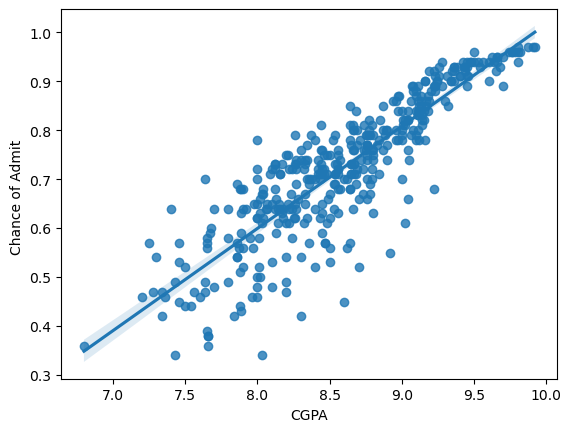

In [11]:
# 本科GPA与入学承认率的关系
sns.regplot(x='CGPA', y='Chance of Admit ', data=data)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

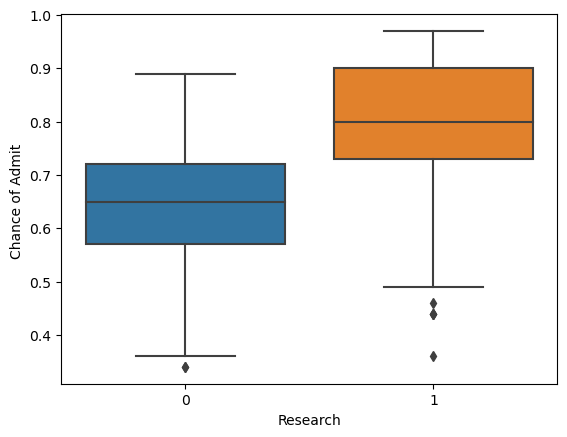

In [12]:
# 研究经历与入学承认率的关系
sns.boxplot(x='Research', y='Chance of Admit ', data=data)

通过可视化，上述 field 的字段中与 ‘Chance of Admit’ 的都有一定的相关性，且相关性均超过0.5，即上述特征均考虑在预测模型中

In [13]:
# 用迭代增加特征的模型优化对特征的选择
lm = linear_model.LinearRegression()
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
y = data['Chance of Admit ']

selected_features = []
rest_features = features[:]
best_acc = -0x7f7f7f7f
while len(rest_features)>0:
    temp_best_i = ''
    temp_best_acc = -0x7f7f7f7f
    for feature_i in rest_features:
        temp_features = selected_features + [feature_i]
        X = data[temp_features]
        scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_absolute_error') # 负均方差来作为分数评价标准
        acc = np.mean(scores)
        if acc > temp_best_acc:
            temp_best_acc = acc
            temp_best_i = feature_i
    print("select",temp_best_i,"acc:",temp_best_acc)
    if temp_best_acc > best_acc:
        best_acc = temp_best_acc
        selected_features += [temp_best_i]
        rest_features.remove(temp_best_i)
    else: 
        break
print("best feature set: ",selected_features,"acc: ",best_acc)

# 因为用交叉检验得到的 scores 是负值且结果均大于负无穷

# 所以 temp_best_acc 和 best_acc 的起始值设置为负无穷


select CGPA acc: -0.052544478165713907
select GRE Score acc: -0.05074151205914499
select LOR  acc: -0.04893266934603155
select TOEFL Score acc: -0.04847770855315416
select Research acc: -0.048381681109844143
select SOP acc: -0.04842869515572236
best feature set:  ['CGPA', 'GRE Score', 'LOR ', 'TOEFL Score', 'Research'] acc:  -0.048381681109844143


通过上述模型，我们能得到 best_feature = ['CGPA', 'GRE Score', 'LOR ', 'TOEFL Score', 'Research']

In [14]:
# 对原始数据进行测试集和训练集的划分
best_features = ['CGPA', 'GRE Score', 'LOR ', 'TOEFL Score', 'Research']

# 对原始数据进行测试集和训练集的划分
char_data = data[best_features]
X_train, X_test, y_train, y_test = train_test_split(char_data, data['Chance of Admit '], train_size=0.8)
# 建立线性回归模型
model = lm.fit(X_test, y_test)
a = list(zip(best_features, model.coef_))
b = model.intercept_
print(f'回归系数：{a}', f'截距：{b}')

回归系数：[('CGPA', 0.12506977508931386), ('GRE Score', 0.002835144733038707), ('LOR ', 0.01597279001534003), ('TOEFL Score', 0.0018695429387886554), ('Research', 0.01669429618050115)] 截距：-1.512253334526915


0.8192593266280586


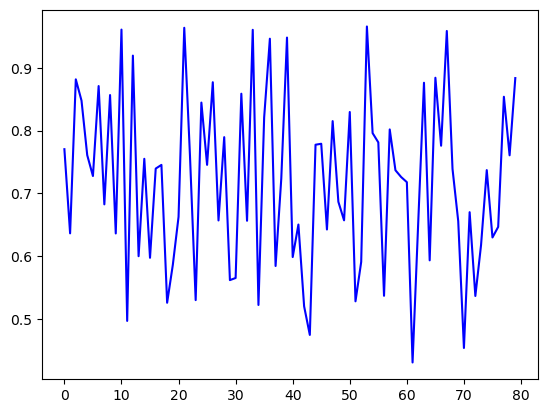

In [15]:
# 评估模型的精确度
score = model.score(X_test, y_test)
print(score)

y_pred = model.predict(X_test) 
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")

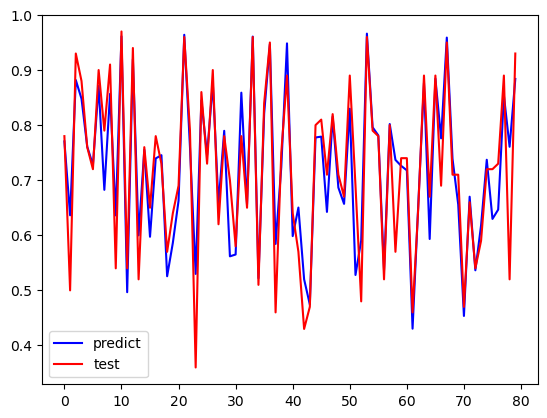

In [16]:
# 预测集与源数据集进行对比
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend()

通过一些列的建模与分析，我们可以知道GRE成绩，本科GPA，托福成绩都，推荐信强度，研究经历这些特征的选取，对模型的分数会有一个极大的提高，但是模型的分数并不理想，需要进一步去优化模型。

为了考虑决策树的模型是否更优于线性回归模型，下面进行决策树的建模：

In [17]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # type: ignore
import pandas as pd
import numpy as np
import graphviz
import os


# 对承认机会进行人工分类，超过0.8的为录取，0.5-0.8之间的为待考虑，低于0.5为不录取
data['Admit_level'] = np.nan  # 创建Admit_level列并初始化为NaN
data['Admit_level'] = data['Admit_level'].astype(str)
data.iloc[data['Chance of Admit '] >= 0.8, data.columns.get_loc('Admit_level')] = 'Admission'
data.iloc[(data['Chance of Admit '] >= 0.5) & (data['Chance of Admit '] < 0.8), data.columns.get_loc('Admit_level')] = 'Pending consideration'
data.iloc[data['Chance of Admit '] < 0.5, data.columns.get_loc('Admit_level')] = 'Not admitted'
print(data['Admit_level'].unique())

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
y = data['Admit_level']
X = data[features]  # 选择正确的特征数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 随机种子
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}') 
import os

# 指定 Graphviz 可执行文件路径
os.environ["PATH"] += os.pathsep + 'D:\ProgramData\Anaconda3\Lib\site-packages\Graphviz-10.0.1-win64\bin'


dot_data = export_graphviz(
    dt_classifier,
    out_file=None,
    feature_names=features,
    class_names=['Admission', 'Pending consideration', 'Not admitted'],
    filled=True,
    rounded=True,
    special_characters=True,
    
)

graph = graphviz.Source(dot_data)

engine='dot'  
graph.render("decision_tree")
graph.view()


['Admission' 'Pending consideration' 'Not admitted']
Accuracy: 0.8


'decision_tree.pdf'